In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import os
from datetime import datetime
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter
import quandl
from sodapy import Socrata
import seaborn as sns

#Clave API para bajar datos de QUANDL
quandl.ApiConfig.api_key = "AA2RGGesxh-s7q4qYFHz"

#Parámetros de fechas
start = datetime(2000, 1, 1)
end = datetime(2021, 1, 8)


In [51]:
#----------------------------------------------DATOS FRED------------------------------------------------#

#Datos de volatilidad
vix = web.DataReader('VIXCLS', 'fred', start, end)
gold_vol = web.DataReader('GVZCLS', 'fred', start, end)
oil_vol = web.DataReader('OVXCLS', 'fred', start, end)
em_vol = web.DataReader('VXEEMCLS', 'fred', start, end)
eurusd_vol = web.DataReader('EVZCLS', 'fred', start, end)

vix['Log_Vix'] = np.log(vix['VIXCLS'])

#Datos de spreads de crédito
AAA_UScorp_spread = web.DataReader('BAMLC0A1CAAA', 'fred', start, end)
AA_UScorp_spread = web.DataReader('BAMLC0A2CAA', 'fred', start, end)
BBB_UScorp_spread = web.DataReader('BAMLC0A4CBBB', 'fred', start, end)
BB_UScorp_spread = web.DataReader('BAMLH0A1HYBB', 'fred', start, end)
B_UScorp_spread = web.DataReader('BAMLH0A2HYBEY', 'fred', start, end)

US_HY_spread = web.DataReader('BAMLH0A0HYM2', 'fred', start, end)
LATAM_corp_spread = web.DataReader('BAMLEMRLCRPILAOAS', 'fred', start, end)


BBB_UScorp_yield = web.DataReader('BAMLC0A4CBBBEY', 'fred', start, end)


#Datos de tasas de interés
#US
#Treasuries
US_2Y = web.DataReader('DGS2', 'fred', start, end)
US_5Y = web.DataReader('DGS5', 'fred', start, end)
US_10Y = web.DataReader('DGS10', 'fred', start, end)
US_30Y = web.DataReader('DGS30', 'fred', start, end)
US_slope_10Y2Y = web.DataReader('T10Y2Y', 'fred', start, end)
#Inflation
US_BEI_5Y = web.DataReader('T5YIE', 'fred', start, end)
US_BEI_10Y = web.DataReader('T10YIE', 'fred', start, end)
US_BEI_5Y5Y = web.DataReader('T5YIFR', 'fred', start, end)
#Real rates
US_TIP_10Y= web.DataReader('DFII10', 'fred', start, end)
#Instantaneous forward rate
US_FWD_1D1Y= web.DataReader('THREEFF1', 'fred', start, end)

#GERMANY
GE_10Y = web.DataReader('IRLTLT01DEM156N', 'fred', start, end)

#JAPAN
JP_10Y = web.DataReader('IRLTLT01JPM156N', 'fred', start, end)


#Datos de tasas de cambio
#Índices del dólar
USD_INDEX_EM =  web.DataReader('DTWEXEMEGS', 'fred', start, end)
USD_INDEX_DEV =  web.DataReader('DTWEXAFEGS', 'fred', start, end)

#Monedas fuertes
EURUSD =  web.DataReader('DEXUSEU', 'fred', start, end)
GBPUSD =  web.DataReader('DEXUSUK', 'fred', start, end)
USDCNH =  web.DataReader('DEXCHUS', 'fred', start, end)
USDJPY =  web.DataReader('DEXJPUS', 'fred', start, end)
USDCAD =  web.DataReader('DEXCAUS', 'fred', start, end)

#Monedas emergentes
USDKRW =  web.DataReader('DEXKOUS', 'fred', start, end)
USDMXN =  web.DataReader('DEXMXUS', 'fred', start, end)
USDBRL =  web.DataReader('DEXBZUS', 'fred', start, end)
USDINR =  web.DataReader('DEXINUS', 'fred', start, end)
USDZAR =  web.DataReader('DEXSFUS', 'fred', start, end)

#Datos acciones
SPX =  web.DataReader('SP500', 'fred', start, end)
NDX =  web.DataReader('NASDAQ100', 'fred', start, end)
DJI =  web.DataReader('DJIA', 'fred', start, end)


#Datos Macro US
US_GDP =  web.DataReader('GDP', 'fred', start, end)
US_GDPNOW=  web.DataReader('GDPNOW', 'fred', start, end)  #Atlanta FED
US_GDPNOWCAST =  web.DataReader('STLENI', 'fred', start, end)  #St Louis FED

US_FED_TOTAL_ASSETS=  web.DataReader('WALCL', 'fred', start, end)  
US_FED_LIQUIDITY_SWAPS =  web.DataReader('SWPT', 'fred', start, end)  
US_FED_TOTAL_ASSETS_NEW = US_FED_TOTAL_ASSETS.merge(US_GDP,how='left', on='DATE')
US_FED_TOTAL_ASSETS_NEW['GDP'].fillna(method='ffill',inplace=True)


US_PUBLIC_DEBT_GDP_PERC =  web.DataReader('GFDEGDQ188S', 'fred', start, end)
US_HOUSEHOLD_DEBT_GDP_PERC =  web.DataReader('HDTGPDUSQ163N', 'fred', start, end)
US_CORP_PROFITS =  web.DataReader('CP', 'fred', start, end)

#Datos Macro EZ
US_ECB_TOTAL_ASSETS=  web.DataReader('ECBASSETSW', 'fred', start, end)  


#----------------------------------------------DATOS QUANDL------------------------------------------------#

#Futuros materias primas
COPPER = quandl.get("CHRIS/CME_HG1",start_date=start, end_date=end)
GOLD = quandl.get("CHRIS/CME_GC1",start_date=start, end_date=end)
OIL = quandl.get("CHRIS/CME_CL1",start_date=start, end_date=end)
COPPER['RATIO'] = COPPER['Last']*100/GOLD['Last']

#Futuros monedas
EURUSD_fut = quandl.get("CHRIS/CME_EC1",start_date=start, end_date=end)

#Tasas de interés
ACM_TERM_PREMIA = quandl.get("FRBNY/ACM_D",start_date=start, end_date=end)

#Inflation
# US_CPI_YOY = quandl.get("ODA/USA_PCPIPCH",start_date=start, end_date=end)
# GE_CPI_YOY = quandl.get("ODA/DEU_PCPIEPCH",start_date=start, end_date=end)
# JP_CPI_YOY = quandl.get("ODA/JPN_PCPIPCH",start_date=start, end_date=end)

US_CPI_YOY = quandl.get("RATEINF/INFLATION_USA",start_date=start, end_date=end)
GE_CPI_YOY = quandl.get("RATEINF/INFLATION_DEU",start_date=start, end_date=end)
JP_CPI_YOY = quandl.get("RATEINF/INFLATION_JPN",start_date=start, end_date=end)



#Macro US
ISM_EXPORTS = quandl.get("ISM/NONMAN_EXPORTS",start_date=start, end_date=end)
ISM_COMPOSITE = quandl.get("ISM/MAN_PMI",start_date=start, end_date=end)


#Tasa de cambio real - datos BIS
USD_REER = quandl.get("BIS/EM_MRNUS",start_date=start, end_date=end)
COP_REER = quandl.get("BIS/EM_MRBCO",start_date=start, end_date=end)
CLP_REER = quandl.get("BIS/EM_MRBCL",start_date=start, end_date=end)
MXN_REER = quandl.get("BIS/EM_MRBMX",start_date=start, end_date=end)
BRL_REER = quandl.get("BIS/EM_MRBBR",start_date=start, end_date=end)
ARS_REER = quandl.get("BIS/EM_MRBAR",start_date=start, end_date=end)

In [3]:
client = Socrata("www.datos.gov.co",
                 "Oy0pJTAMwxGuC0c5SBC9nuuAU",
                 username="43xcm1yx3xh1eb5lv8e374g1s",
                 password="1zt8gsxe1mfh3h6fyh6281n1qitip816l2d6wnc1zvvs2dyidz")

USDCOP_TRM = client.get("mcec-87by", limit=10000)
USDCOP_TRM_df = pd.DataFrame.from_records(USDCOP_TRM)
USDCOP_TRM_df.sort_values('vigenciadesde')

,valor,unidad,vigenciadesde,vigenciahasta
7001,643.42,COP,1991-12-02T00:00:00.000,1991-12-02T00:00:00.000
7000,639.22,COP,1991-12-03T00:00:00.000,1991-12-03T00:00:00.000
6999,635.70,COP,1991-12-04T00:00:00.000,1991-12-04T00:00:00.000
6998,631.51,COP,1991-12-05T00:00:00.000,1991-12-05T00:00:00.000
6997,627.16,COP,1991-12-06T00:00:00.000,1991-12-06T00:00:00.000
...,...,...,...,...
4,3432.5,COP,2020-12-31T00:00:00.000,2021-01-04T00:00:00.000
3,3420.78,COP,2021-01-05T00:00:00.000,2021-01-05T00:00:00.000
2,3450.74,COP,2021-01-06T00:00:00.000,2021-01-06T00:00:00.000
1,3428.04,COP,2021-01-07T00:00:00.000,2021-01-07T00:00:00.000


In [4]:
client = Socrata("www.datos.gov.co",
                 "Oy0pJTAMwxGuC0c5SBC9nuuAU",
                 username="43xcm1yx3xh1eb5lv8e374g1s",
                 password="1zt8gsxe1mfh3h6fyh6281n1qitip816l2d6wnc1zvvs2dyidz")

VU_FONDOS_PENSIONES_OBL = client.get("uawh-cjvi", limit=200000)
VU_FONDOS_PENSIONES_OBL_df = pd.DataFrame.from_records(VU_FONDOS_PENSIONES_OBL)
VU_FONDOS_PENSIONES_OBL_df.sort_values('fecha')

,fecha,codigo_entidad,nombre_entidad,codigo_patrimonio,nombre_fondo,valor_unidad
329,1999-03-01T00:00:00.000,3,Porvenir,1000,Fondo de Pensiones Moderado,4409.960000
327,1999-03-01T00:00:00.000,2,Proteccion,1000,Fondo de Pensiones Moderado,4013.230000
328,1999-03-01T00:00:00.000,3,Porvenir,1,Fondo de Cesantias Largo Plazo,5869.090000
339,1999-03-01T00:00:00.000,10,Colfondos S.A. Pensiones Y Cesantias,1000,Fondo de Pensiones Moderado,3827.000000
338,1999-03-01T00:00:00.000,10,Colfondos S.A. Pensiones Y Cesantias,1,Fondo de Cesantias Largo Plazo,5331.870000
...,...,...,...,...,...,...
156951,2020-12-31T00:00:00.000,2,Proteccion,2,Fondo de Cesantias Corto Plazo,29712.960000
156950,2020-12-31T00:00:00.000,2,Proteccion,1,Fondo de Cesantias Largo Plazo,31945.920000
156973,2020-12-31T00:00:00.000,10,Colfondos S.A. Pensiones Y Cesantias,6000,Fondo de Pensiones Mayor Riesgo,57451.500000
156961,2020-12-31T00:00:00.000,3,Porvenir,7000,Fondo de Pensiones Retiro Programado,58563.660000


In [5]:
#CBONDS

# # library for making requests to a web service
# import requests
# # library for working with data
# import pandas as pd
# # connect a method that converts a JSON string to a table
# from pandas.io.json import json_normalize
# # library for delay between requests
# import time


# url = 'https://ws.cbonds.info/services/json?login=Test&password=Test'
# # url = 'https://ws.cbonds.info/services/json?login=Test&password=Test&lang=rus' - in Russian
# # request a JSON schema describing all available web service operations
# response = requests.get(url).json()
# json_scheme = json_normalize(response)
# # get a description of the get emissions operation
# # emissions_scheme = json_normalize(json_scheme['service.get_emissions.arguments.filters'][0])
# index_scheme = json_normalize(json_scheme['service.get_index_value.arguments.filters'][0])
# # description output
# # print(emissions_scheme)
# # print(index_scheme)

# index_scheme

In [6]:
# symbol = 'FB.US'
# quandl = web.DataReader(symbol, 'quandl', '2015-01-01')

#EXAMPLES
# oil = quandl.get('EIA/PET_RWTC_D',start_date="2001-12-31", end_date="2005-12-31").squeeze()
# oil = quandl.get('EIA/PET_RWTC_D',start_date="2000-12-31", end_date="2020-12-18")

# To request specific columns:

# mydata = quandl.get(["NSE/OIL.1", "WIKI/AAPL.4"])
# To request the last n rows:

# mydata = quandl.get("WIKI/AAPL", rows=5)

# To change the sampling frequency:

# mydata = quandl.get("EIA/PET_RWTC_D", collapse="monthly")

# FB = quandl.get('WIKI/FB',start_date="2000-12-31", end_date="2020-12-18")

# data = quandl.get_table('MER/F1', compnumber="39102", paginate=True)
# quandl.get_table('MER/F1', paginate=True)

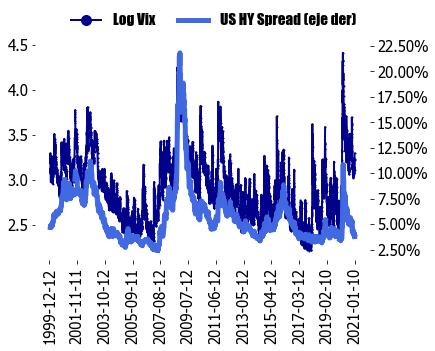

In [5]:
#------------------------GRÁFICO VIX VS SPREAD HIGH YIELD-----------------------------------#
font = font_manager.FontProperties(family='Impact',weight='bold', style='normal', size=15)
tick_spacing1 = 700

fig = plt.figure()

ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(vix.index,vix['Log_Vix'],marker='o', linestyle='solid',linewidth=2,color='darkblue',alpha=0.99,label='Log Vix',markersize=1)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.4, 1.2),ncol=10,markerscale=10)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.title.set_fontfamily('arial')
ax1.axis([None, None, None, None])
vals = ax1.get_yticks()
ax1.set_yticklabels(['{:,.2}'.format(x) for x in vals])
plt.box(on=None)

ax2 = ax1.twinx()
ax2.plot(US_HY_spread.index,US_HY_spread['BAMLH0A0HYM2'],marker='o',linestyle='solid',linewidth=5,color='royalblue',alpha=0.99,label='US HY Spread (eje der)',markersize=1)
ax2.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(1.0, 1.2),ncol=10,markerscale=3)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax2.axis([None, None, None, None])
vals = ax2.get_yticks()
ax2.set_yticklabels(['{:,.2%}'.format(x/100) for x in vals])
plt.box(on=None)


plt.show()

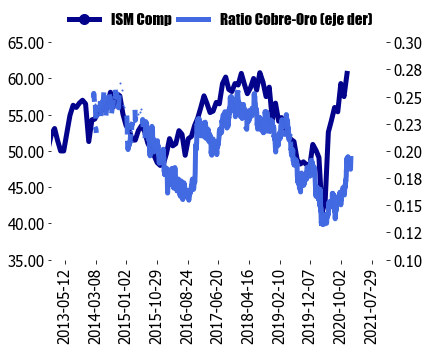

In [6]:
#------------------------GRÁFICO ISM VS RATIO ORO-COBRE-----------------------------------#
font = font_manager.FontProperties(family='Impact',weight='bold', style='normal', size=15)
tick_spacing1 = 300

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax1.plot(ISM_COMPOSITE.index,ISM_COMPOSITE['PMI'],marker='o', linestyle='solid',linewidth=5,color='darkblue',alpha=0.99,label='ISM Comp',markersize=1)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.4, 1.2),ncol=10,markerscale=10)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.title.set_fontfamily('arial')
ax1.axis(['2012-12-31', None, 35, 65])
vals = ax1.get_yticks()
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.box(on=None)

ax2 = ax1.twinx()
ax2.plot(COPPER.index,COPPER['RATIO'],marker='o',linestyle='solid',linewidth=5,color='royalblue',alpha=0.99,label='Ratio Cobre-Oro (eje der)',markersize=1)
ax2.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(1.0, 1.2),ncol=10,markerscale=3)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax2.axis(['2012-12-31', None, 0.10, 0.3])
vals = ax2.get_yticks()
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# ax2.yaxis.set_major_formatter(FormatStrFormatter('%2.2f%%'))
plt.box(on=None)



plt.show()

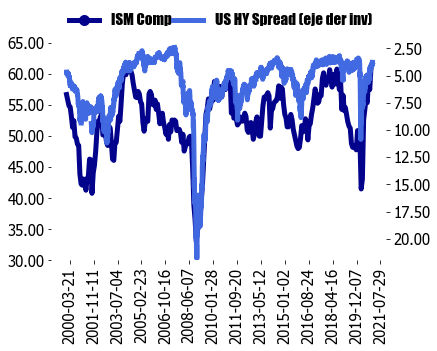

In [7]:
#------------------------GRÁFICO ISM VS SPREAD HIGH YIELD-----------------------------------#
font = font_manager.FontProperties(family='Impact',weight='bold', style='normal', size=15)
tick_spacing1 = 600

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax1.plot(ISM_COMPOSITE.index,ISM_COMPOSITE['PMI'],marker='o', linestyle='solid',linewidth=5,color='darkblue',alpha=0.99,label='ISM Comp',markersize=1)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.4, 1.2),ncol=10,markerscale=10)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.title.set_fontfamily('arial')
ax1.axis([None, None, 30, 65])
vals = ax1.get_yticks()
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.box(on=None)

ax2 = ax1.twinx()
ax2.plot(US_HY_spread.index,US_HY_spread['BAMLH0A0HYM2'],marker='o',linestyle='solid',linewidth=5,color='royalblue',alpha=0.99,label='US HY Spread (eje der inv)',markersize=1)
ax2.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(1.0, 1.2),ncol=10,markerscale=3)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax2.axis([None, None, 22, 2])
vals = ax2.get_yticks()
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# ax2.yaxis.set_major_formatter(FormatStrFormatter('%2.2f%%'))
plt.box(on=None)



plt.show()

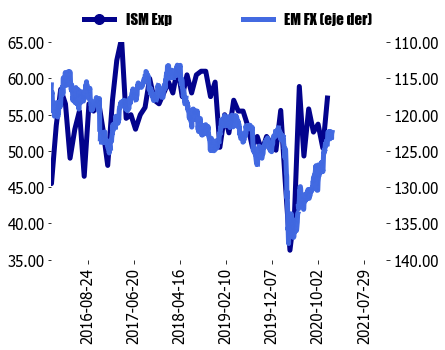

In [8]:
#------------------------GRÁFICO ISM EXPORTS VS EMFX----------------------------------#
font = font_manager.FontProperties(family='Impact',weight='bold', style='normal', size=15)
tick_spacing1 = 300

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax1.plot(ISM_EXPORTS.index,ISM_EXPORTS['Diffusion Index'],marker='o', linestyle='solid',linewidth=5,color='darkblue',alpha=0.99,label='ISM Exp',markersize=1)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.4, 1.2),ncol=10,markerscale=10)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.title.set_fontfamily('arial')
ax1.axis(['2015-12-31', None, 35, 65])
vals = ax1.get_yticks()
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.box(on=None)

ax2 = ax1.twinx()
ax2.plot(USD_INDEX_EM.index,USD_INDEX_EM['DTWEXEMEGS'],marker='o',linestyle='solid',linewidth=5,color='royalblue',alpha=0.99,label='EM FX (eje der)',markersize=1)
ax2.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(1.0, 1.2),ncol=10,markerscale=3)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax2.axis(['2015-12-31', None, 140, 110])
vals = ax2.get_yticks()
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# ax2.yaxis.set_major_formatter(FormatStrFormatter('%2.2f%%'))
plt.box(on=None)

plt.show()


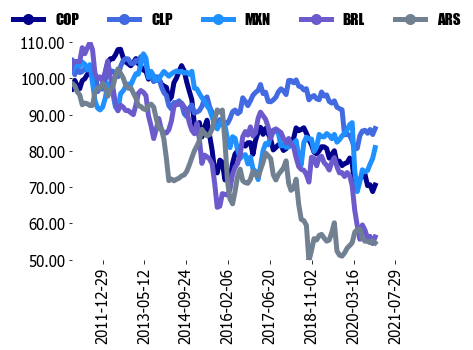

In [9]:
#------------------------GRÁFICO EMFX REER-----------------------------------------#
font = font_manager.FontProperties(family='Impact',weight='bold', style='normal', size=15)
tick_spacing1 = 500

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax1.plot(COP_REER.index,COP_REER['Value'],marker='o', linestyle='solid',linewidth=5,color='darkblue',alpha=0.99,label='COP',markersize=1)
ax1.plot(CLP_REER.index,CLP_REER['Value'],marker='o', linestyle='solid',linewidth=5,color='royalblue',alpha=0.99,label='CLP',markersize=1)
ax1.plot(MXN_REER.index,MXN_REER['Value'],marker='o', linestyle='solid',linewidth=5,color='dodgerblue',alpha=0.99,label='MXN',markersize=1)
ax1.plot(BRL_REER.index,BRL_REER['Value'],marker='o', linestyle='solid',linewidth=5,color='slateblue',alpha=0.99,label='BRL',markersize=1)
ax1.plot(ARS_REER.index,ARS_REER['Value'],marker='o', linestyle='solid',linewidth=5,color='slategray',alpha=0.99,label='ARS',markersize=1)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(1.2, 1.2),ncol=10,markerscale=10)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.title.set_fontfamily('arial')
ax1.axis(['2010-12-31', None, 50, 110])
vals = ax1.get_yticks()
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.box(on=None)

plt.show()

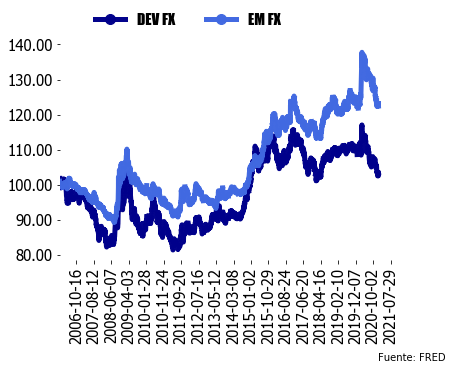

In [10]:
#------------------------GRÁFICO DEVFX VS EMFX----------------------------------#
font = font_manager.FontProperties(family='Impact',weight='bold', style='normal', size=15)
tick_spacing1 = 300

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax1.plot(USD_INDEX_DEV.index,USD_INDEX_DEV['DTWEXAFEGS'],marker='o', linestyle='solid',linewidth=5,color='darkblue',alpha=0.99,label='DEV FX',markersize=1)
ax1.plot(USD_INDEX_EM.index,USD_INDEX_EM['DTWEXEMEGS'],marker='o',linestyle='solid',linewidth=5,color='royalblue',alpha=0.99,label='EM FX',markersize=1)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.7, 1.2),ncol=10,markerscale=10)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.title.set_fontfamily('arial')
ax1.axis(['2005-12-31', None, None, None])
vals = ax1.get_yticks()
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.box(on=None)

plt.text(USD_INDEX_EM.index[-1], 50,'Fuente: FRED' , color='black', fontsize=10)

plt.show()

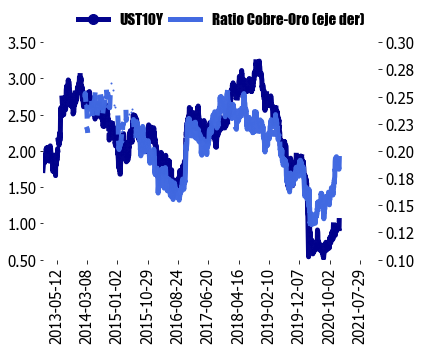

In [11]:
#------------------------GRÁFICO US10Y VS RATIO ORO-COBRE-----------------------------------#
font = font_manager.FontProperties(family='Impact',weight='bold', style='normal', size=15)
tick_spacing1 = 300

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax1.plot(US_10Y.index,US_10Y['DGS10'],marker='o', linestyle='solid',linewidth=5,color='darkblue',alpha=0.99,label='UST10Y',markersize=1)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.4, 1.2),ncol=10,markerscale=10)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.title.set_fontfamily('arial')
ax1.axis(['2012-12-31', None, 0.5, 3.5])
vals = ax1.get_yticks()
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.box(on=None)

ax2 = ax1.twinx()
ax2.plot(COPPER.index,COPPER['RATIO'],marker='o',linestyle='solid',linewidth=5,color='royalblue',alpha=0.99,label='Ratio Cobre-Oro (eje der)',markersize=1)
ax2.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(1.0, 1.2),ncol=10,markerscale=3)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax2.axis(['2012-12-31', None, 0.10, 0.3])
vals = ax2.get_yticks()
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# ax2.yaxis.set_major_formatter(FormatStrFormatter('%2.2f%%'))
plt.box(on=None)



plt.show()

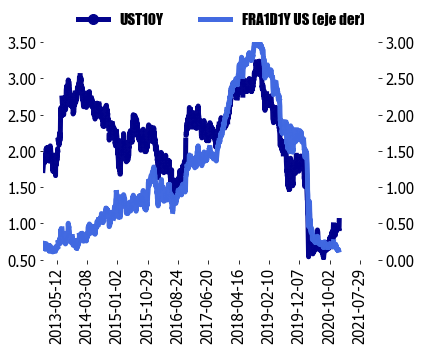

In [12]:
#------------------------GRÁFICO US10Y VS RATIO ORO-COBRE-----------------------------------#
font = font_manager.FontProperties(family='Impact',weight='bold', style='normal', size=15)
tick_spacing1 = 300

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax1.plot(US_10Y.index,US_10Y['DGS10'],marker='o', linestyle='solid',linewidth=5,color='darkblue',alpha=0.99,label='UST10Y',markersize=1)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.4, 1.2),ncol=10,markerscale=10)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.title.set_fontfamily('arial')
ax1.axis(['2012-12-31', None, 0.5, 3.5])
vals = ax1.get_yticks()
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.box(on=None)

ax2 = ax1.twinx()
ax2.plot(US_FWD_1D1Y.index,US_FWD_1D1Y['THREEFF1'],marker='o',linestyle='solid',linewidth=5,color='royalblue',alpha=0.99,label='FRA1D1Y US (eje der)',markersize=1)
ax2.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(1.0, 1.2),ncol=10,markerscale=3)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax2.axis(['2012-12-31', None, 0, 3.00])
vals = ax2.get_yticks()
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# ax2.yaxis.set_major_formatter(FormatStrFormatter('%2.2f%%'))
plt.box(on=None)



plt.show()

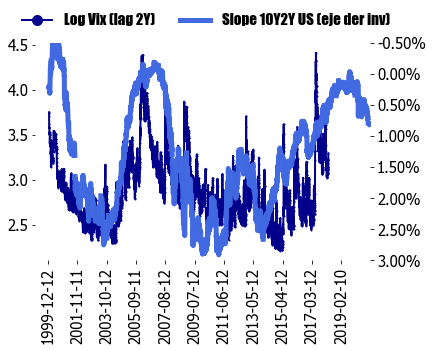

In [13]:
#------------------------GRÁFICO VIX VS PENDIENTE 10Yvs2Y US-----------------------------------#
font = font_manager.FontProperties(family='Impact',weight='bold', style='normal', size=15)
tick_spacing1 = 700

fig = plt.figure()

ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(vix.index,vix['Log_Vix'].shift(-720),marker='o', linestyle='solid',linewidth=2,color='darkblue',alpha=0.99,label='Log Vix (lag 2Y)',markersize=1)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.4, 1.2),ncol=10,markerscale=10)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.title.set_fontfamily('arial')
ax1.axis([None, '2020-12-20', None, None])
vals = ax1.get_yticks()
ax1.set_yticklabels(['{:,.2}'.format(x) for x in vals])
plt.box(on=None)

ax2 = ax1.twinx()
ax2.plot(US_slope_10Y2Y.index,US_slope_10Y2Y['T10Y2Y'],marker='o',linestyle='solid',linewidth=5,color='royalblue',alpha=0.99,label='Slope 10Y2Y US (eje der inv)',markersize=1)
ax2.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(1.1, 1.2),ncol=10,markerscale=3)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax2.axis([None, '2020-12-20', 3, -0.5])
vals = ax2.get_yticks()
ax2.set_yticklabels(['{:,.2%}'.format(x/100) for x in vals])
plt.box(on=None)


plt.show()

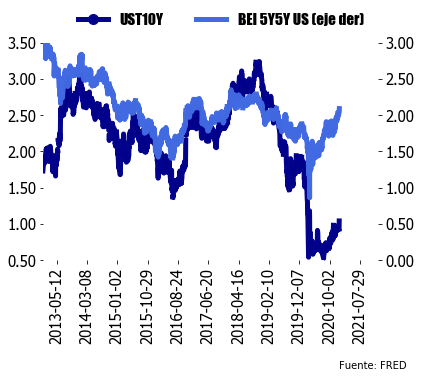

In [14]:
#------------------------GRÁFICO US10Y VS BEI5Y5Y US-----------------------------------#
font = font_manager.FontProperties(family='Impact',weight='bold', style='normal', size=15)
tick_spacing1 = 300

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax1.plot(US_10Y.index,US_10Y['DGS10'],marker='o', linestyle='solid',linewidth=5,color='darkblue',alpha=0.99,label='UST10Y',markersize=1)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.4, 1.2),ncol=10,markerscale=10)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.title.set_fontfamily('arial')
ax1.axis(['2012-12-31', None, 0.5, 3.5])
vals = ax1.get_yticks()
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.box(on=None)

ax2 = ax1.twinx()
ax2.plot(US_BEI_5Y5Y.index,US_BEI_5Y5Y['T5YIFR'],marker='o',linestyle='solid',linewidth=5,color='royalblue',alpha=0.99,label='BEI 5Y5Y US (eje der)',markersize=1)
ax2.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(1.0, 1.2),ncol=10,markerscale=3)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax2.axis(['2012-12-31', None, 0, 3.00])
vals = ax2.get_yticks()
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# ax2.yaxis.set_major_formatter(FormatStrFormatter('%2.2f%%'))
plt.box(on=None)

plt.text(US_BEI_5Y5Y.index[-1], -1.5,'Fuente: FRED' , color='black', fontsize=10)

plt.show()

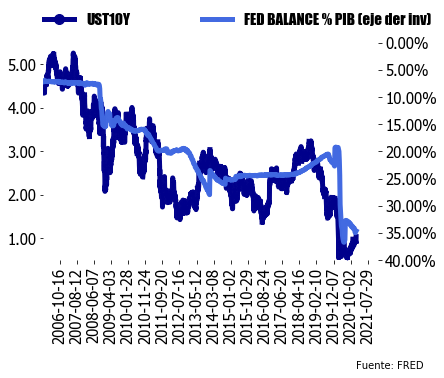

In [16]:
#------------------------GRÁFICO US10Y VS FED BALANCE-----------------------------------#
font = font_manager.FontProperties(family='Impact',weight='bold', style='normal', size=15)
tick_spacing1 = 300

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax1.plot(US_10Y.index,US_10Y['DGS10'],marker='o', linestyle='solid',linewidth=5,color='darkblue',alpha=0.99,label='UST10Y',markersize=1)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.3, 1.2),ncol=10,markerscale=10)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.title.set_fontfamily('arial')
ax1.axis(['2005-12-31', None, 0.5, 5.5])
vals = ax1.get_yticks()
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.box(on=None)

ax2 = ax1.twinx()
ax2.plot(US_FED_TOTAL_ASSETS_NEW.index,US_FED_TOTAL_ASSETS_NEW['WALCL']/(US_FED_TOTAL_ASSETS_NEW['GDP']*10),marker='o',linestyle='solid',linewidth=5,color='royalblue',alpha=0.99,label='FED BALANCE % PIB (eje der inv)',markersize=1)
ax2.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(1.2, 1.2),ncol=10,markerscale=3)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax2.axis(['2005-12-31', None, 40, 0])
vals = ax2.get_yticks()
# ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax2.yaxis.set_major_formatter(FormatStrFormatter('%2.2f%%'))
plt.box(on=None)

plt.text(US_FED_TOTAL_ASSETS_NEW.index[-1], 60,'Fuente: FRED' , color='black', fontsize=10)

plt.show()

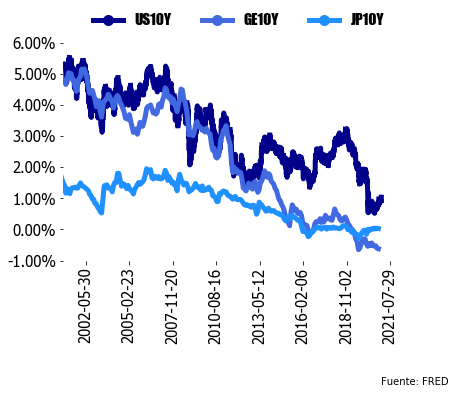

In [48]:
#------------------------GRÁFICO US10Y VS GE10Y vs JP10Y-----------------------------------#
font = font_manager.FontProperties(family='Impact',weight='bold', style='normal', size=15)
tick_spacing1 = 1000

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax1.plot(US_10Y.index,US_10Y['DGS10'],marker='o', linestyle='solid',linewidth=5,color='darkblue',alpha=0.99,label='US10Y',markersize=1)
ax1.plot(GE_10Y.index,GE_10Y['IRLTLT01DEM156N'],marker='o', linestyle='solid',linewidth=5,color='royalblue',alpha=0.99,label='GE10Y',markersize=1)
ax1.plot(JP_10Y.index,JP_10Y['IRLTLT01JPM156N'],marker='o', linestyle='solid',linewidth=5,color='dodgerblue',alpha=0.99,label='JP10Y',markersize=1)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(1.0, 1.2),ncol=10,markerscale=10)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.title.set_fontfamily('arial')
ax1.axis(['2000-12-31', None, -1, 6])
vals = ax1.get_yticks()
ax1.yaxis.set_major_formatter(FormatStrFormatter('%2.2f%%'))
plt.box(on=None)

plt.text(US_10Y.index[-1], -5,'Fuente: FRED' , color='black', fontsize=10)

plt.show()


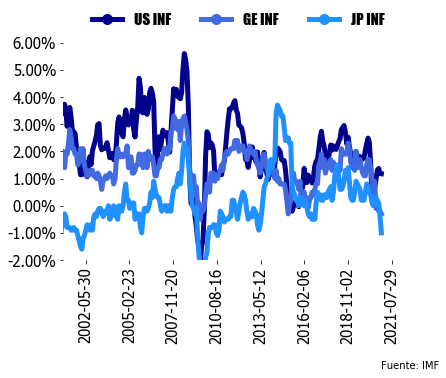

In [53]:
#------------------------GRÁFICO US INF VS GE INF vs JP INF-----------------------------------#
font = font_manager.FontProperties(family='Impact',weight='bold', style='normal', size=15)
tick_spacing1 = 1000

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax1.plot(US_CPI_YOY.index,US_CPI_YOY['Value'],marker='o', linestyle='solid',linewidth=5,color='darkblue',alpha=0.99,label='US INF',markersize=1)
ax1.plot(GE_CPI_YOY.index,GE_CPI_YOY['Value'],marker='o', linestyle='solid',linewidth=5,color='royalblue',alpha=0.99,label='GE INF',markersize=1)
ax1.plot(JP_CPI_YOY.index,JP_CPI_YOY['Value'],marker='o', linestyle='solid',linewidth=5,color='dodgerblue',alpha=0.99,label='JP INF',markersize=1)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(1.0, 1.2),ncol=10,markerscale=10)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.title.set_fontfamily('arial')
ax1.axis(['2000-12-31', None, -2, 6])
vals = ax1.get_yticks()
ax1.yaxis.set_major_formatter(FormatStrFormatter('%2.2f%%'))
plt.box(on=None)

plt.text(US_CPI_YOY.index[-1], -6,'Fuente: IMF' , color='black', fontsize=10)

plt.show()

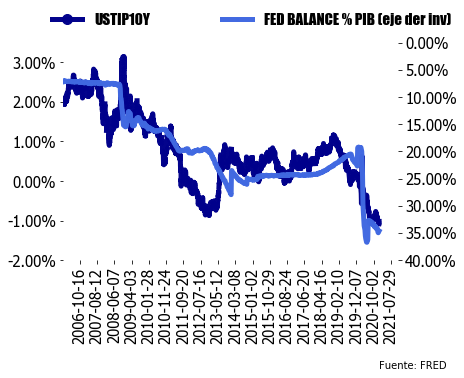

In [54]:
#------------------------GRÁFICO US10Y VS FED BALANCE-----------------------------------#
font = font_manager.FontProperties(family='Impact',weight='bold', style='normal', size=15)
tick_spacing1 = 300

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax1.plot(US_TIP_10Y.index,US_TIP_10Y['DFII10'],marker='o', linestyle='solid',linewidth=5,color='darkblue',alpha=0.99,label='USTIP10Y',markersize=1)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.3, 1.2),ncol=10,markerscale=10)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.title.set_fontfamily('arial')
ax1.axis(['2005-12-31', None, -2, 3.5])
vals = ax1.get_yticks()
ax1.yaxis.set_major_formatter(FormatStrFormatter('%2.2f%%'))
plt.box(on=None)

ax2 = ax1.twinx()
ax2.plot(US_FED_TOTAL_ASSETS_NEW.index,US_FED_TOTAL_ASSETS_NEW['WALCL']/(US_FED_TOTAL_ASSETS_NEW['GDP']*10),marker='o',linestyle='solid',linewidth=5,color='royalblue',alpha=0.99,label='FED BALANCE % PIB (eje der inv)',markersize=1)
ax2.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(1.2, 1.2),ncol=10,markerscale=3)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax2.axis(['2005-12-31', None, 40, 0])
vals = ax2.get_yticks()
# ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax2.yaxis.set_major_formatter(FormatStrFormatter('%2.2f%%'))
plt.box(on=None)

plt.text(US_FED_TOTAL_ASSETS_NEW.index[-1], 60,'Fuente: FRED' , color='black', fontsize=10)

plt.show()

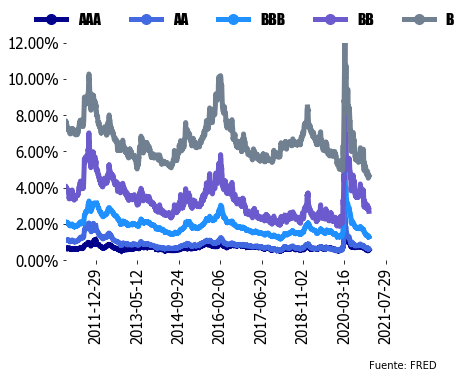

In [58]:
#------------------------GRÁFICO Spreads de Crédito-----------------------------------------#
font = font_manager.FontProperties(family='Impact',weight='bold', style='normal', size=15)
tick_spacing1 = 500

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax1.plot(AAA_UScorp_spread.index,AAA_UScorp_spread['BAMLC0A1CAAA'],marker='o', linestyle='solid',linewidth=5,color='darkblue',alpha=0.99,label='AAA',markersize=1)
ax1.plot(AA_UScorp_spread.index,AA_UScorp_spread['BAMLC0A2CAA'],marker='o', linestyle='solid',linewidth=5,color='royalblue',alpha=0.99,label='AA',markersize=1)
ax1.plot(BBB_UScorp_spread.index,BBB_UScorp_spread['BAMLC0A4CBBB'],marker='o', linestyle='solid',linewidth=5,color='dodgerblue',alpha=0.99,label='BBB',markersize=1)
ax1.plot(BB_UScorp_spread.index,BB_UScorp_spread['BAMLH0A1HYBB'],marker='o', linestyle='solid',linewidth=5,color='slateblue',alpha=0.99,label='BB',markersize=1)
ax1.plot(B_UScorp_spread.index,B_UScorp_spread['BAMLH0A2HYBEY'],marker='o', linestyle='solid',linewidth=5,color='slategray',alpha=0.99,label='B',markersize=1)

ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(1.2, 1.2),ncol=10,markerscale=10)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.title.set_fontfamily('arial')
ax1.axis(['2010-12-31', None, 0, 12])
vals = ax1.get_yticks()
ax1.yaxis.set_major_formatter(FormatStrFormatter('%2.2f%%'))
plt.box(on=None)

plt.text(AAA_UScorp_spread.index[-1], -6,'Fuente: FRED' , color='black', fontsize=10)

plt.show()